In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv('F:/ML_algo/datasets/vgsales.csv')
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# how big is the data
df.shape


(16598, 11)

In [4]:
# what is the data type of cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [110]:
# changing datatype of year into int, datetime
df['Year']= df['Year'].astype(int)
# df['Year']=pd.to_datetime(df['Year'],format='%Y')
print(df['Year'].dtype)


int64


In [111]:
# are there any missing values
df.isnull().sum()


Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [5]:
# hadling missing values 
df['Publisher'].fillna(df['Publisher'].mode()[0],inplace=True)
# check
df['Publisher'].isnull().sum()

C:\Users\IT SOLUTION\AppData\Local\Temp\ipykernel_12600\2168832274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna(df['Publisher'].mode()[0],inplace=True)


np.int64(0)

In [6]:
# how does the data look mathemathecially
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
# are there any duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# check correlation bbetwen the cols
# df.corr(method='pearson')#for linear relationship
# df.corr(method='spearman')# for monotonic relationship 
# df.corr(method='kendall')# for rank correlation 
df['NA_Sales'].corr(df['EU_Sales'])

np.float64(0.7677267483702636)

In [9]:
#catogarical column

## a. univariate analysis




In [10]:
df['Genre']


0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: Genre, Length: 16598, dtype: object

In [61]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [12]:
cat_counts=df['Genre'].value_counts()
cat_counts
# top 5 genure from this i can find

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [13]:
# now by visulization
#  bar chart
x=cat_counts.index
x

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object', name='Genre')

In [121]:
y=cat_counts.values
y

array([3316, 2346, 1739, 1488, 1310, 1286, 1249,  886,  867,  848,  681,
        582])

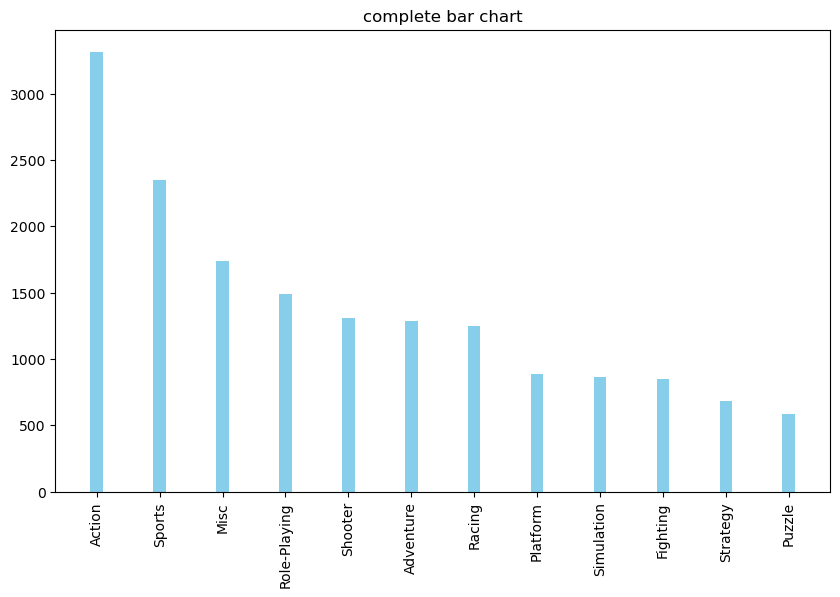

In [135]:
plt.figure(figsize=(10,6))
plt.bar(x,y,color ='skyblue',width=0.2)
plt.xticks(rotation=90)
plt.title('complete bar chart')
# plt.xlabel('Genre')
# plt.ylabel('Counts')

plt.show()

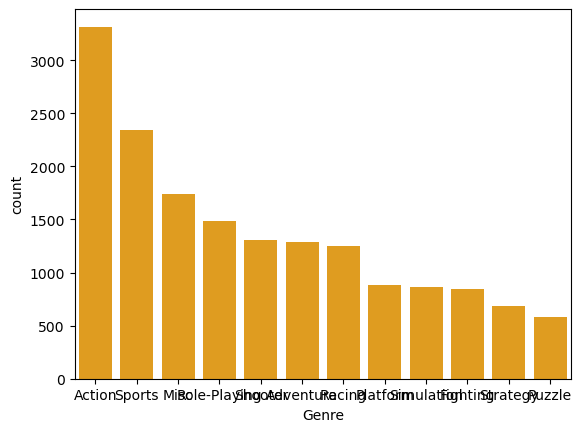

In [143]:
sns.countplot(x='Genre',
              data=df,
              order=df['Genre'].value_counts().index,
             color='orange',
             
              
         )
plt.show()



<Axes: xlabel='Genre'>

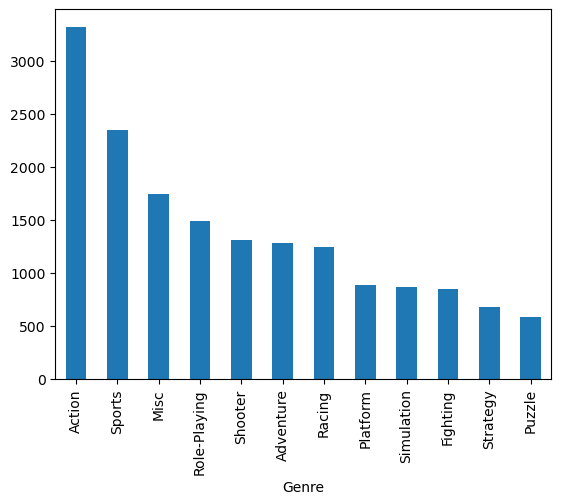

In [14]:
# same above with this
# categorical data
df['Genre'].value_counts().plot(kind ='bar')

### pie chart

In [146]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,1136073600000000000,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [15]:
sales_data=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales',]]
sales_data.head(2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24


In [19]:
# transpose sales
region_sales=sales_data.T.sum(axis='columns')
region_sales

NA_Sales        4392.95
EU_Sales        2434.13
JP_Sales        1291.02
Other_Sales      797.75
Global_Sales    8920.44
dtype: float64

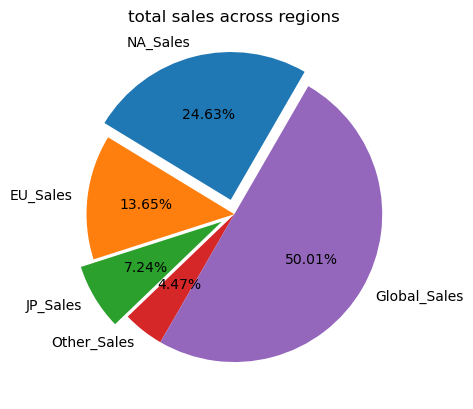

In [169]:
# pie plot
plt.pie(region_sales,
       labels=region_sales.index,
        startangle=60,
        explode=[0.1,0,0.1,0,0],
        autopct='%.2f%%'
     )
plt.title('total sales across regions')
plt.show()

In [183]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
# # pichart
# df['Genre'].value_counts().plot(kind='pie',
#                                 autopct='%.2f',
#                                 startangle=60,shadow =True)
# plt.show()

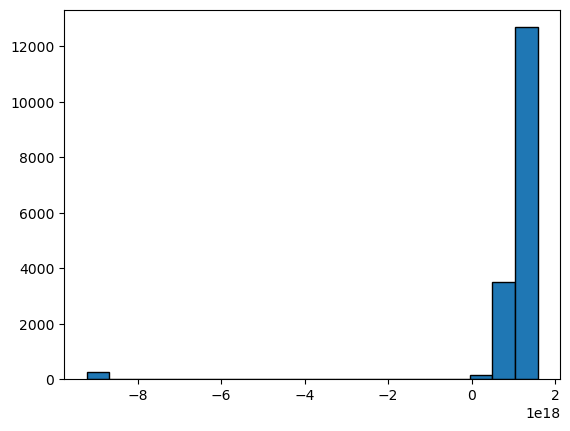

In [185]:
# 2. for numerical data
# a. histogram
plt.hist(df['Year'],
         bins =20,
         edgecolor='black',
         # alpha=.07
        )


plt.show()


C:\Users\IT SOLUTION\AppData\Local\Temp\ipykernel_12600\1610633503.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'],bins=30)


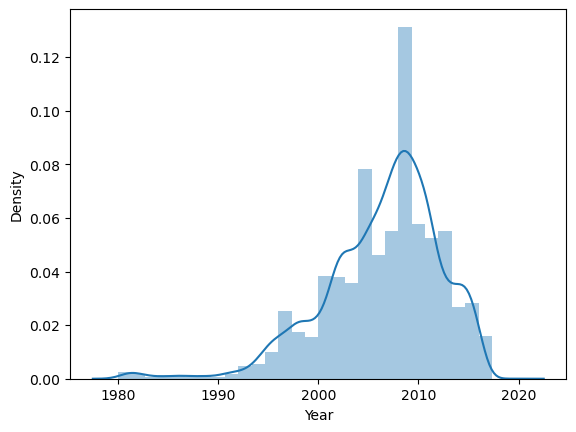

In [21]:

sns.distplot(df['Year'],bins=30)
plt.show()
# sns.histplot(df['Year'],bins=10 )

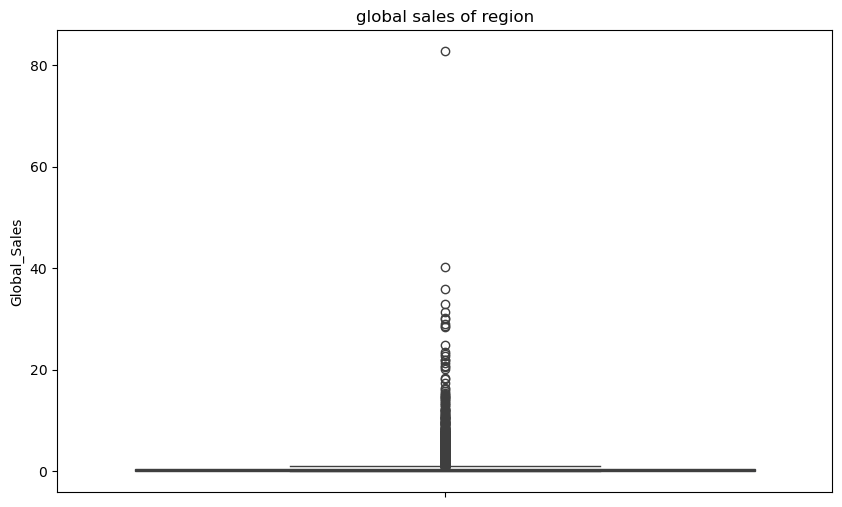

In [22]:
# box plot
plt.figure(figsize=(10,6))
sns.boxplot(df['Global_Sales'])

plt.title('global sales of region')
plt.show()

In [23]:
df['Global_Sales'].min()

0.01

In [24]:
df['Global_Sales'].max()


82.74

In [25]:
df['Global_Sales'].skew()


np.float64(17.400645097552452)

# bivarient analysis


#### numerical vs numerical 

In [43]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [52]:
# line plot
a= df.loc[df['Name'] == 'Ice Hockey']

In [62]:
a.shape


(2, 11)

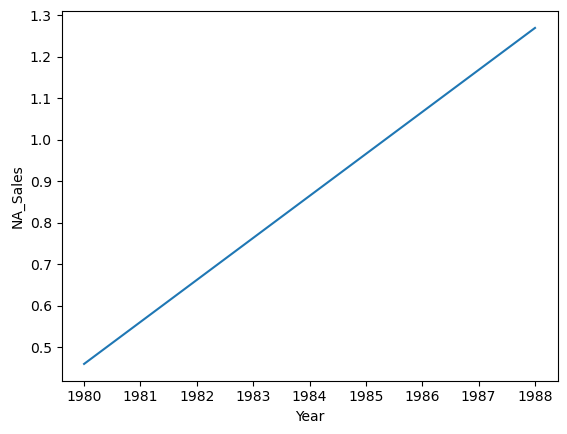

In [63]:
sns.lineplot(data=a,
            x='Year',
            y='NA_Sales'
            )
plt.show()

In [67]:
df['Name'].value_counts()

Name
Need for Speed: Most Wanted      12
LEGO Marvel Super Heroes          9
Ratatouille                       9
Madden NFL 07                     9
FIFA 14                           9
                                 ..
Farming 2017 - The Simulation     1
Kinect Adventures!                1
Wii Fit Plus                      1
Wii Fit                           1
Nintendogs                        1
Name: count, Length: 11493, dtype: int64

In [70]:
b= df.loc[df['Name'] == 'Baseball']
b


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
1142,1144,Baseball,GB,1989.0,Sports,Nintendo,0.66,0.27,0.65,0.03,1.61


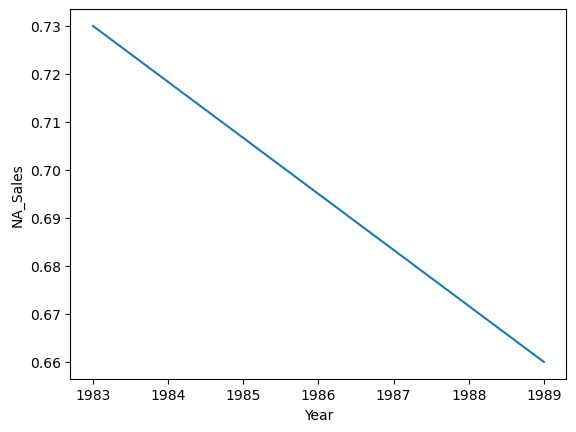

In [71]:
sns.lineplot(data=b,
            x='Year',
            y='NA_Sales'
            )
plt.show()

In [72]:
# merge two graphs

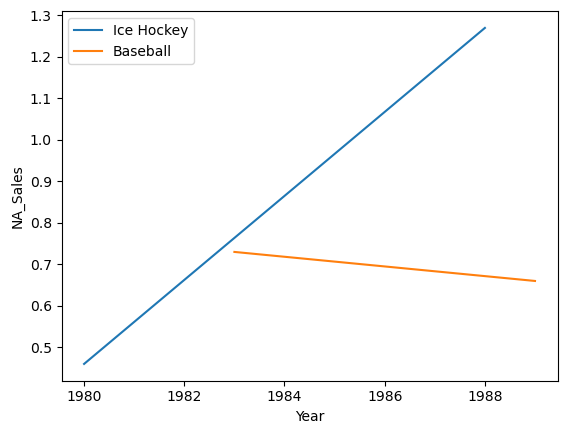

In [81]:
sns.lineplot(data=a,
            x='Year',
            y='NA_Sales',
             label='Ice Hockey'
            )
sns.lineplot(data=b,
            x='Year',
            y='NA_Sales',
            label='Baseball'
             
            )
plt.legend(loc='upper left')
plt.show()

#### scater plot

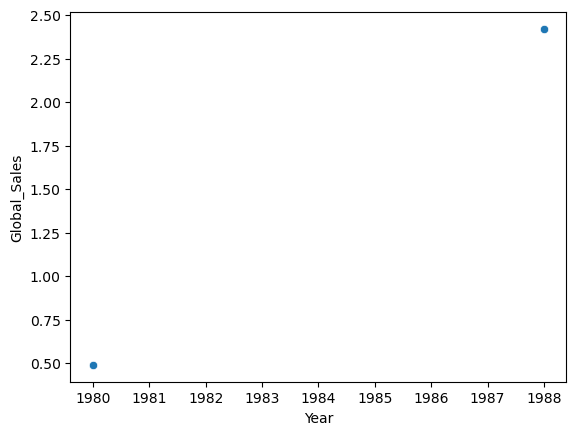

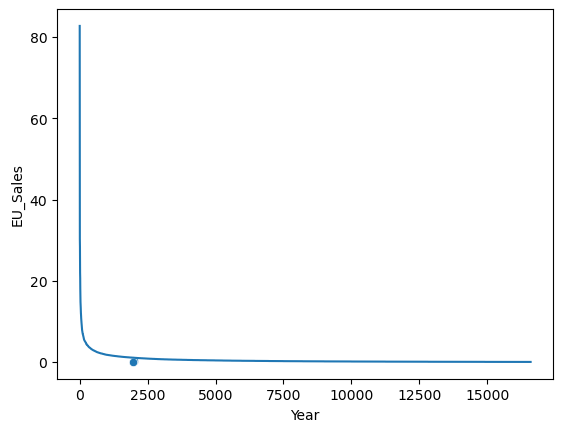

In [103]:
sns.scatterplot(data=a,x='Year',y='EU_Sales')
sns.lineplot(data=df,x='Rank',y='Global_Sales')
plt.show()

<Axes: xlabel='Rank', ylabel='Global_Sales'>

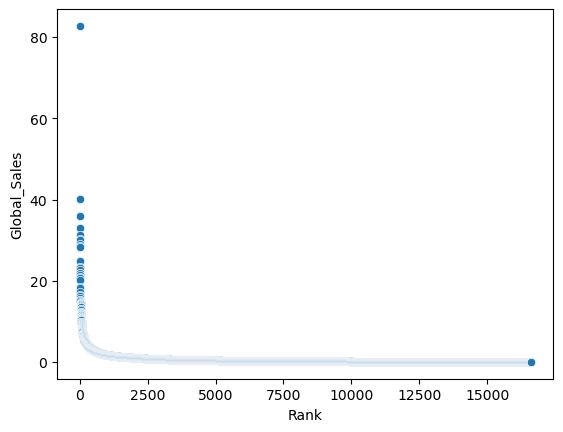

In [104]:
sns.scatterplot(data=df,x='Rank',y='Global_Sales')

#### categorical vs car

In [88]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [106]:
# plt.figure(figsize=(12,8))
# sns.countplot( x='Publisher',data=df, hue='Platform')



In [126]:
# top 5 platforms
top_3_pub = df['Publisher'].value_counts().index[:3]
top_3_gen = df['Genre'].value_counts().index[:3]
top_3_plt = df['Platform'].value_counts().index[:3]



In [127]:
top_3_pub

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games'], dtype='object', name='Publisher')

In [128]:
top_3_data =df.loc[(df['Publisher'].isin(top_3_pub) &
                   (df['Genre'].isin(top_3_gen)) &
                  (df['Platform'].isin(top_3_plt))) ]

# top_5_data

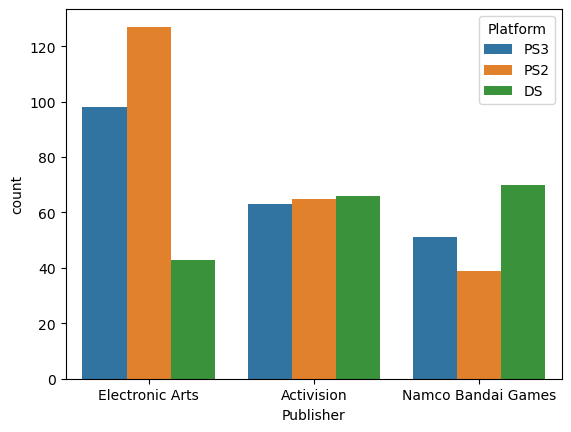

In [129]:
sns.countplot(data=top_3_data,x='Publisher',hue='Platform',)
plt.show()

In [137]:
df_stacked_plt=pd.crosstab(index=top_3_data['Publisher'],columns=top_3_data['Platform'])
df_stacked_plt


Platform,DS,PS2,PS3
Publisher,,,
Activision,66,65,63
Electronic Arts,43,127,98
Namco Bandai Games,70,39,51


<Axes: xlabel='Publisher'>

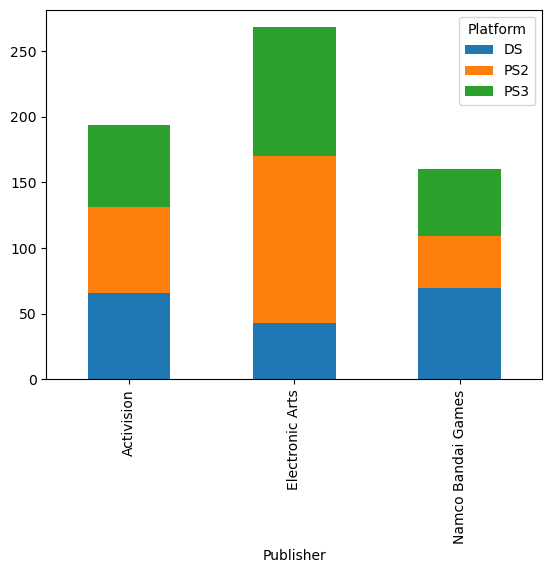

In [138]:
df_stacked_plt.plot(kind='bar',stacked=True)